In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample Figures with One Model

In [5]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"
model_results = pd.read_csv(f"runs/runs-42/{model_name}-results.csv")

In [20]:
model_results = op.organize_distribution(model_results)

In [29]:
model_results.groupby('prompt_type').aggregate({'Covered_Num': "sum", 'NotCovered_Num': "sum"})

,Covered_Num,NotCovered_Num
prompt_type,,
agreement,5.0,133.0
agreement_negation,24.0,114.0
disagreement,54.0,84.0
disagreement_negation,36.0,102.0
negation,69.0,69.0
no_or_yes,0.0,138.0
options,2.0,136.0
options_flipped,90.0,48.0
yes_or_no,2.0,136.0


In [88]:
models= [
   # "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    # "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # "gpt2-medium",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b-it"
]
def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Covered_Num"] = 1
    model_results.loc[model_results["Covered"] == False, "Covered_Num"] = 0
    model_results.loc[model_results["NotCovered"] == True, "NotCovered_Num"] = 1
    model_results.loc[model_results["NotCovered"] == False, "NotCovered_Num"] = 0
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in models]
combined_df = pd.concat(combined_results).reset_index()
combined_df.shape

meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    822
B      259
No      91
no      47
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    790
B      184
no     176
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
allenai/OLMo-2-1124-7B-Instruct output
no      732
yes     229
B       170
A       106
[         4
\n\n      1
Name: count, dtype: int64
mistralai/Ministral-8B-Instruct-2410 output
No       455
Yes      270
yes      232
B        214
A         60
no         6
**         3
Carol      2
Name: count, dtype: int64
google/gemma-7b-it output
 yes    627
 no     309
\n\n    271
 Yes     22
 B       13
Name: count, dtype: int64


(8694, 23)

In [89]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_probs,No_probs,...,Aff_prob,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Covered_Num,NotCovered_Num
5702,734,Hot Work II,disagreement,Martha has an insurance policy that covers acc...,controversial,no,no. I am just justifying my answer.\n\nTo det...,NaN,0.014411,0.01282,...,0.01282,0.014411,0.470777,0.529223,False,True,0.143808,OLMo-2-1124-7B-Instruct,0.0,1.0


In [94]:
by_model_prompt_type = combined_df.groupby(['prompt_type', 'model_name'],as_index=False, sort=False).aggregate({'Covered_Num': "sum", 'NotCovered_Num': "sum"})
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type[["Covered_Num", "NotCovered_Num"]].max(axis=1)
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type["Majority_Proportion"].apply(lambda x: x/138)

In [95]:
by_model_prompt_type

,prompt_type,model_name,Covered_Num,NotCovered_Num,Majority_Proportion
0,yes_or_no,Llama-3.2-1B-Instruct,66.0,72.0,0.521739
1,no_or_yes,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
2,negation,Llama-3.2-1B-Instruct,109.0,29.0,0.789855
3,agreement,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
4,agreement_negation,Llama-3.2-1B-Instruct,138.0,0.0,1.000000
...,...,...,...,...,...
58,agreement_negation,gemma-7b-it,138.0,0.0,1.000000
59,disagreement,gemma-7b-it,16.0,122.0,0.884058
60,disagreement_negation,gemma-7b-it,4.0,134.0,0.971014
61,options,gemma-7b-it,138.0,0.0,1.000000


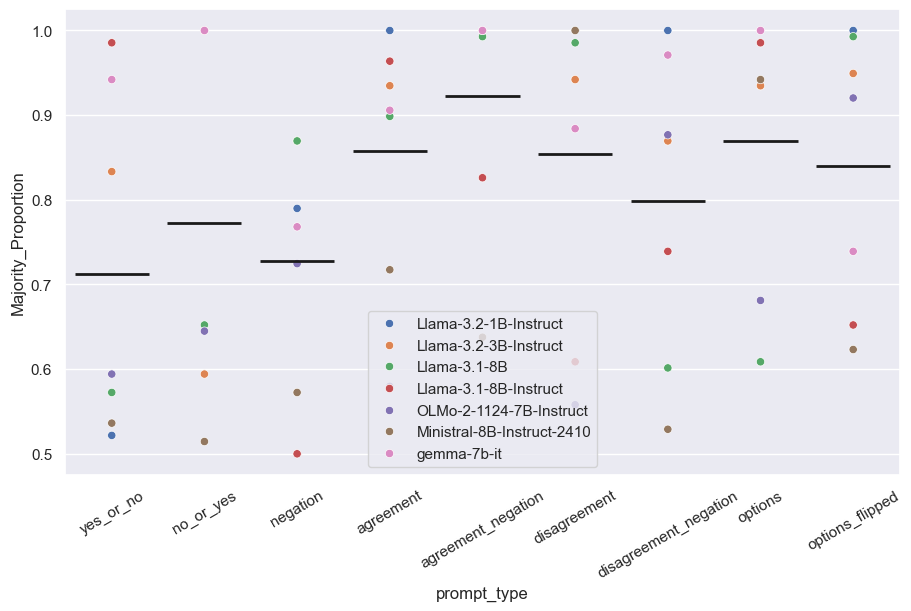

In [98]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='prompt_type', y='Majority_Proportion', hue='model_name', data=by_model_prompt_type)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="prompt_type",
            y="Majority_Proportion",
            data=by_model_prompt_type,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.show()